In [15]:
import os
import json
import pandas as pd
import numpy as np



In [16]:
results = dict()

data_dir = "results"
for file_path in os.listdir(data_dir):
    with open(os.path.join(data_dir, file_path)) as f:
        results[file_path[:-5]] = json.load(f)

In [17]:
def get_result_table(statistic_name: str):
    tmp_dict = dict()
    problem_names=list()
    for name, data in results.items():
        problem_name, solver_name = name.split("-")
        if problem_name not in problem_names:
            problem_names.append(problem_name)
        if solver_name not in tmp_dict:
            tmp_dict[solver_name] = []
        tmp_dict[solver_name].append(data[statistic_name])
    return pd.DataFrame(tmp_dict, index=problem_names)

def get_result_table_average(statistic_name: str):
    tmp_dict = dict()
    problem_names=list()
    for name, data in results.items():
        problem_name, solver_name = name.split("-")
        if problem_name not in problem_names:
            problem_names.append(problem_name)
        if solver_name not in tmp_dict:
            tmp_dict[solver_name] = []
        tmp_dict[solver_name].append(
            np.average([solution[statistic_name] for solution in data["solutions"]])
            )
    return pd.DataFrame(tmp_dict, index=problem_names)

In [18]:
avg_times = get_result_table("avg_time")
avg_times.head()

,GreedySearchSolver,HeuristicSolver,RandomSearchSolver,RandomWalkSolver,SteepestSearchSolver
bur26a,0.002201,0.000017,0.002208,0.002206,0.002844
chr12a,0.000070,0.000006,0.000073,0.000072,0.000090
chr22a,0.000731,0.000013,0.000737,0.000735,0.001090
els19,0.000962,0.000011,0.000967,0.000966,0.000778
esc32e,0.000346,0.000022,0.000354,0.000353,0.001047


In [19]:
avg_cost = get_result_table_average("cost")
avg_cost.head()

,GreedySearchSolver,HeuristicSolver,RandomSearchSolver,RandomWalkSolver,SteepestSearchSolver
bur26a,5.445425e+06,5940358.0,5.628761e+06,5.614830e+06,5.444306e+06
chr12a,1.428212e+04,41064.0,2.471650e+04,2.284012e+04,1.391265e+04
chr22a,6.979823e+03,12420.0,1.000913e+04,9.597292e+03,6.996749e+03
els19,2.259623e+07,38627698.0,3.059925e+07,2.914552e+07,2.165328e+07
esc32e,2.000000e+00,44.0,1.454359e+01,1.396825e+01,2.000000e+00


In [20]:
optimum = get_result_table("optimal_cost")
avg_dist_to_optimum = avg_cost / optimum
avg_dist_to_optimum.head()

,GreedySearchSolver,HeuristicSolver,RandomSearchSolver,RandomWalkSolver,SteepestSearchSolver
bur26a,1.003456,1.094660,1.037240,1.034673,1.003250
chr12a,1.495196,4.298995,2.587573,2.391135,1.456517
chr22a,1.133824,2.017544,1.625915,1.559014,1.136574
els19,1.312777,2.244159,1.777729,1.693272,1.257994
esc32e,1.000000,22.000000,7.271793,6.984127,1.000000


In [21]:
avg_evaluated_solutions = get_result_table_average("iteration_counts")
avg_evaluated_solutions.drop("HeuristicSolver", axis=1, inplace=True)
avg_evaluated_solutions.head()

,GreedySearchSolver,RandomSearchSolver,RandomWalkSolver,SteepestSearchSolver
bur26a,5741.868132,722.598234,4618.151982,7206.321023
chr12a,371.476977,76.999053,246.954912,508.200595
chr22a,2241.088321,309.653392,1704.432770,3392.781046
els19,3408.140385,523.722705,2531.384170,2786.661742
esc32e,725.141376,79.871722,604.909700,2194.125523


In [22]:
avg_steps = get_result_table_average("step_count")
avg_steps = avg_steps[["GreedySearchSolver", "SteepestSearchSolver"]]
avg_steps.head()

,GreedySearchSolver,SteepestSearchSolver
bur26a,96.529670,21.173295
chr12a,14.183975,6.700009
chr22a,34.819708,13.687364
els19,56.086538,15.296267
esc32e,6.186657,3.423640


In [23]:
def get_result_table_with_std(statistic_name: str):
    """Get mean and std of a statistic across solutions for each solver and problem"""
    means = dict()
    stds = dict()
    problem_names = []
    
    for name, data in results.items():
        problem_name, solver_name = name.split("-")
        if problem_name not in problem_names:
            problem_names.append(problem_name)
        if solver_name not in means:
            means[solver_name] = []
            stds[solver_name] = []
            
        values = [solution[statistic_name] for solution in data["solutions"]]
        means[solver_name].append(np.mean(values))
        stds[solver_name].append(np.std(values))
        
    return pd.DataFrame(means, index=problem_names), pd.DataFrame(stds, index=problem_names)

In [24]:
import matplotlib.pyplot as plt

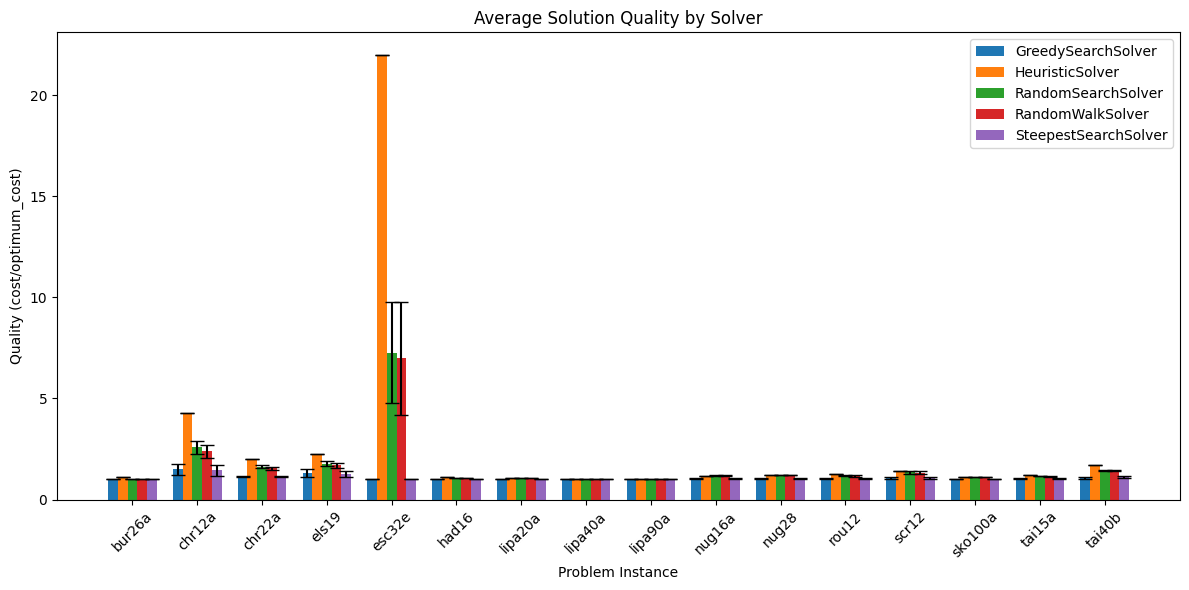

In [25]:
means_cost, stds_cost = get_result_table_with_std("cost")
optimum = get_result_table("optimal_cost")
quality_means = means_cost / optimum
quality_stds = stds_cost / optimum

plt.figure(figsize=(12, 6))
bar_width = 0.15
index = np.arange(len(quality_means.index))

for i, solver in enumerate(quality_means.columns):
    plt.bar(index + i * bar_width, 
            quality_means[solver], 
            bar_width,
            yerr=quality_stds[solver],
            label=solver,
            capsize=5)

plt.xlabel('Problem Instance')
plt.ylabel('Quality (cost/optimum_cost)')
plt.title('Average Solution Quality by Solver')
plt.xticks(index + bar_width * 2, quality_means.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

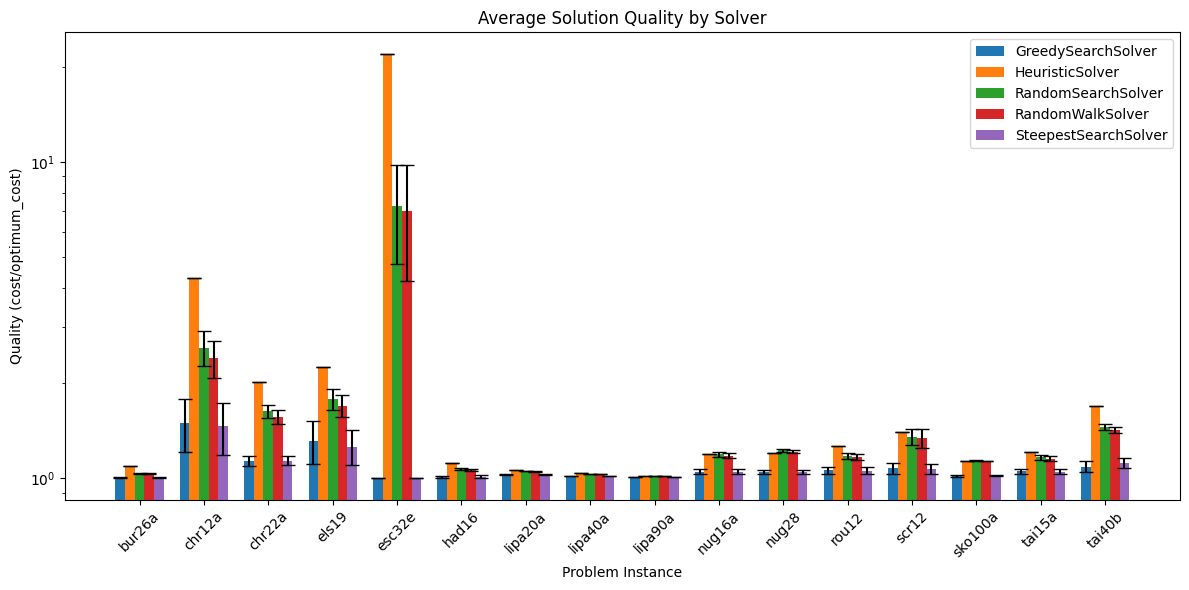

In [34]:
means_cost, stds_cost = get_result_table_with_std("cost")
optimum = get_result_table("optimal_cost")
quality_means = means_cost / optimum
quality_stds = stds_cost / optimum

plt.figure(figsize=(12, 6))
bar_width = 0.15
index = np.arange(len(quality_means.index))

for i, solver in enumerate(quality_means.columns):
    plt.bar(index + i * bar_width, 
            quality_means[solver], 
            bar_width,
            yerr=quality_stds[solver],
            label=solver,
            capsize=5)

plt.xlabel('Problem Instance')
plt.ylabel('Quality (cost/optimum_cost)')
plt.title('Average Solution Quality by Solver')
plt.xticks(index + bar_width * 2, quality_means.index, rotation=45)
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.show()

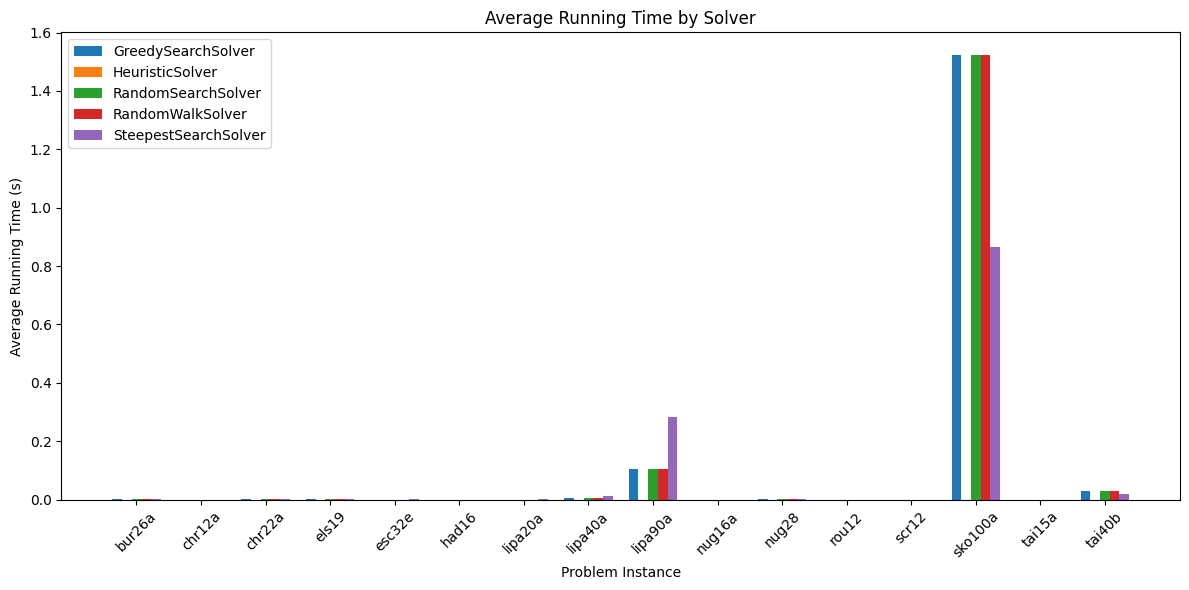

In [ ]:
means_time = get_result_table("avg_time")

plt.figure(figsize=(12, 6))
for i, solver in enumerate(means_time.columns):
    plt.bar(index + i * bar_width, 
            means_time[solver], 
            bar_width,
        
            label=solver,
            capsize=5)

plt.xlabel('Problem Instance')
plt.ylabel('Average Running Time (s)')
plt.title('Average Running Time by Solver')
plt.xticks(index + bar_width * 2, means_time.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

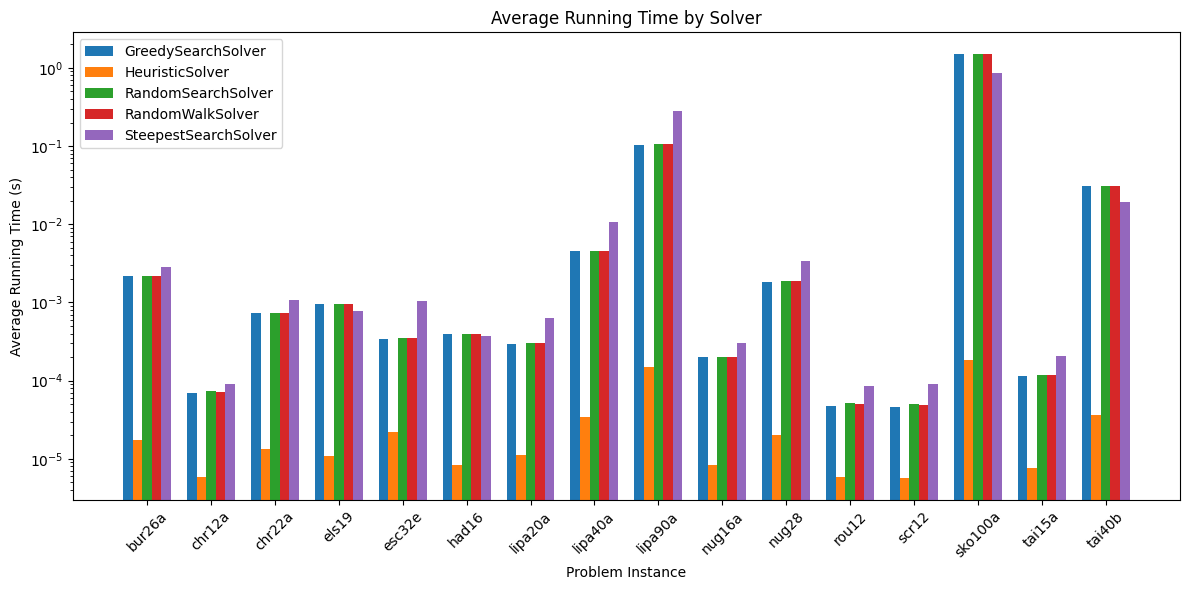

In [41]:
means_time = get_result_table("avg_time")

plt.figure(figsize=(12, 6))
bar_width = 0.15
index = np.arange(len(means_time.index))

for i, solver in enumerate(means_time.columns):
    plt.bar(index + i * bar_width, 
            means_time[solver], 
            bar_width,
            label=solver)

plt.xlabel('Problem Instance')
plt.ylabel('Average Running Time (s)')
plt.title('Average Running Time by Solver')
plt.xticks(index + bar_width * 2, means_time.index, rotation=45)
plt.yscale('log')  # Set log scale for y-axis
plt.legend()
plt.tight_layout()
plt.show()

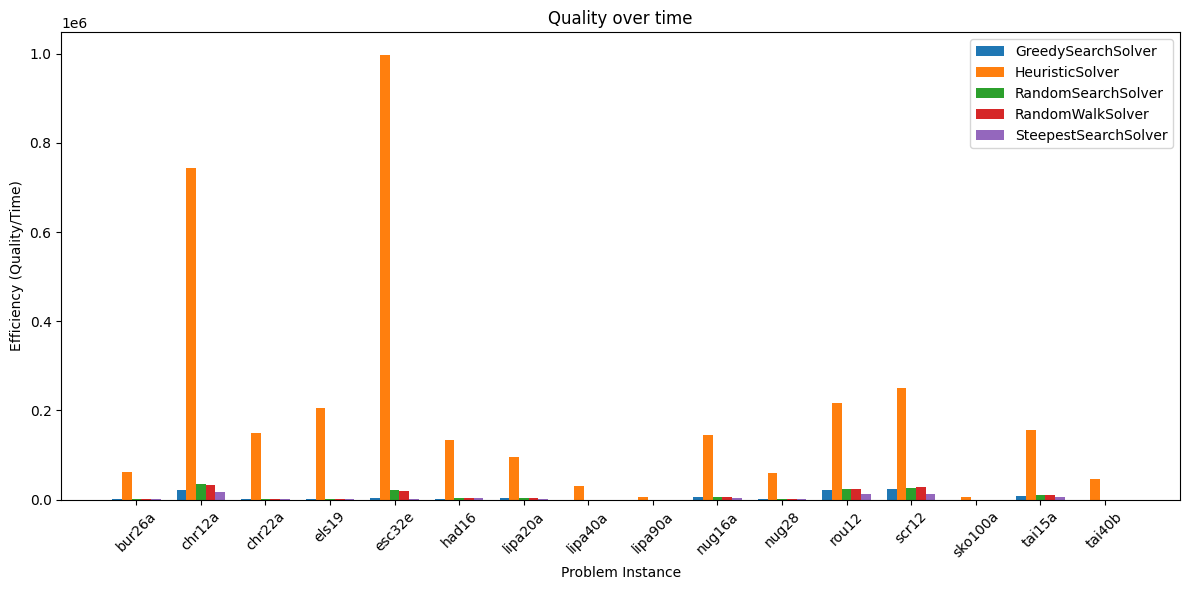

In [40]:

efficiency_means = quality_means / means_time


plt.figure(figsize=(12, 6))
for i, solver in enumerate(efficiency_means.columns):
    plt.bar(index + i * bar_width, 
            efficiency_means[solver], 
            bar_width,
        
            label=solver,
            capsize=5)

plt.xlabel('Problem Instance')
plt.ylabel('Efficiency (Quality/Time)')
plt.title('Quality over time')
plt.xticks(index + bar_width * 2, efficiency_means.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

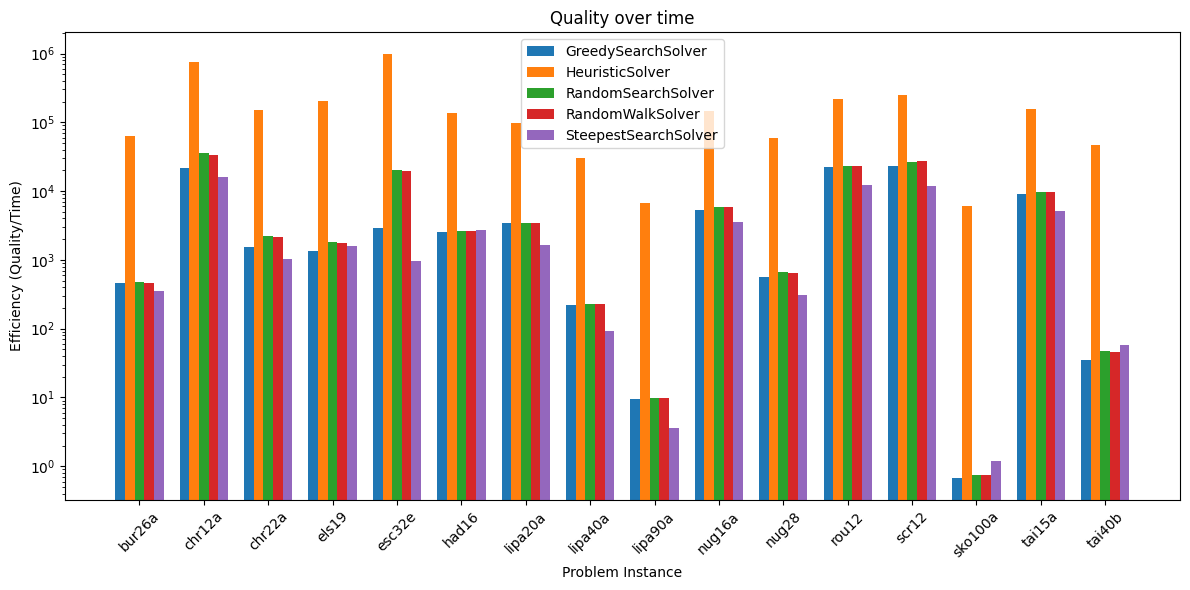

In [39]:

efficiency_means = quality_means / means_time


plt.figure(figsize=(12, 6))
for i, solver in enumerate(efficiency_means.columns):
    plt.bar(index + i * bar_width, 
            efficiency_means[solver], 
            bar_width,
        
            label=solver,
            capsize=5)

plt.xlabel('Problem Instance')
plt.ylabel('Efficiency (Quality/Time)')
plt.title('Quality over time')
plt.xticks(index + bar_width * 2, efficiency_means.index, rotation=45)
plt.legend()
plt.yscale('log')
plt.tight_layout()
plt.show()

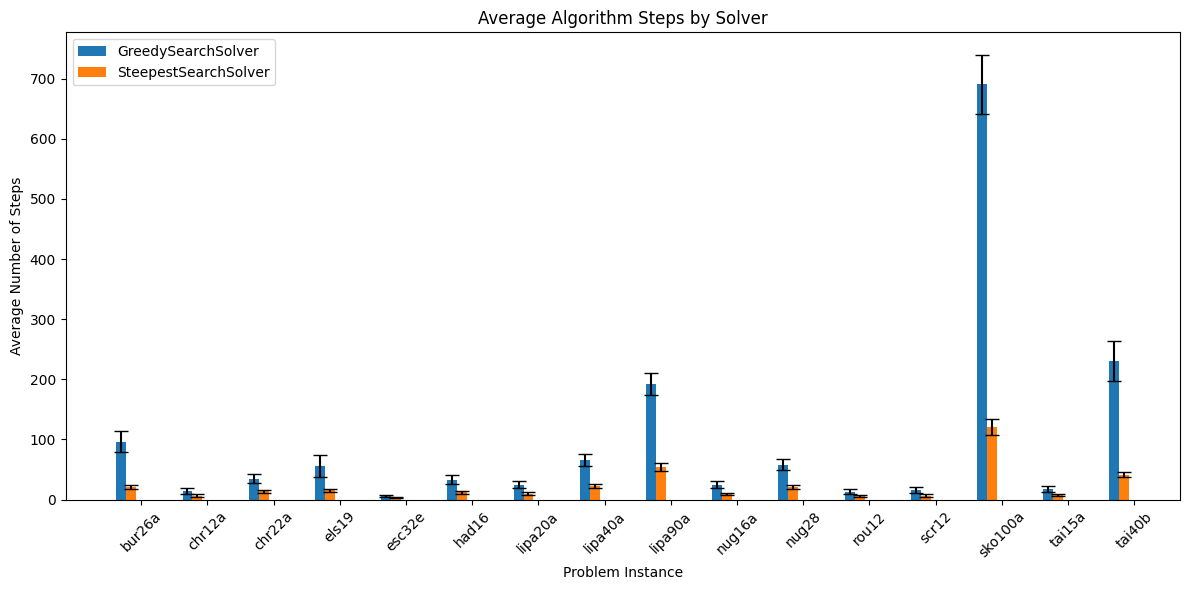

In [42]:
means_steps, stds_steps = get_result_table_with_std("step_count")
steps_data = means_steps[["GreedySearchSolver", "SteepestSearchSolver"]]
steps_stds = stds_steps[["GreedySearchSolver", "SteepestSearchSolver"]]

plt.figure(figsize=(12, 6))
for i, solver in enumerate(steps_data.columns):
    plt.bar(index + i * bar_width, 
            steps_data[solver], 
            bar_width,
            yerr=steps_stds[solver],
            label=solver,
            capsize=5)

plt.xlabel('Problem Instance')
plt.ylabel('Average Number of Steps')
plt.title('Average Algorithm Steps by Solver')
plt.xticks(index + bar_width * 2, steps_data.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

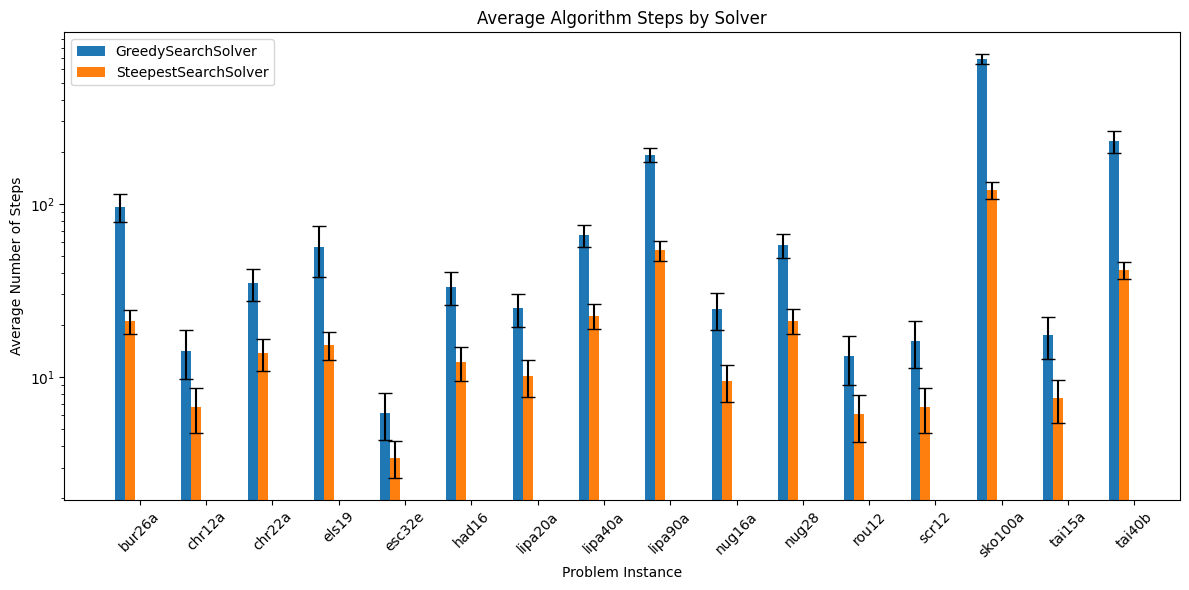

In [46]:
means_steps, stds_steps = get_result_table_with_std("step_count")
steps_data = means_steps[["GreedySearchSolver", "SteepestSearchSolver"]]
steps_stds = stds_steps[["GreedySearchSolver", "SteepestSearchSolver"]]

plt.figure(figsize=(12, 6))
for i, solver in enumerate(steps_data.columns):
    plt.bar(index + i * bar_width, 
            steps_data[solver], 
            bar_width,
            yerr=steps_stds[solver],
            label=solver,
            capsize=5)

plt.xlabel('Problem Instance')
plt.ylabel('Average Number of Steps')
plt.title('Average Algorithm Steps by Solver')
plt.xticks(index + bar_width * 2, steps_data.index, rotation=45)
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.show()

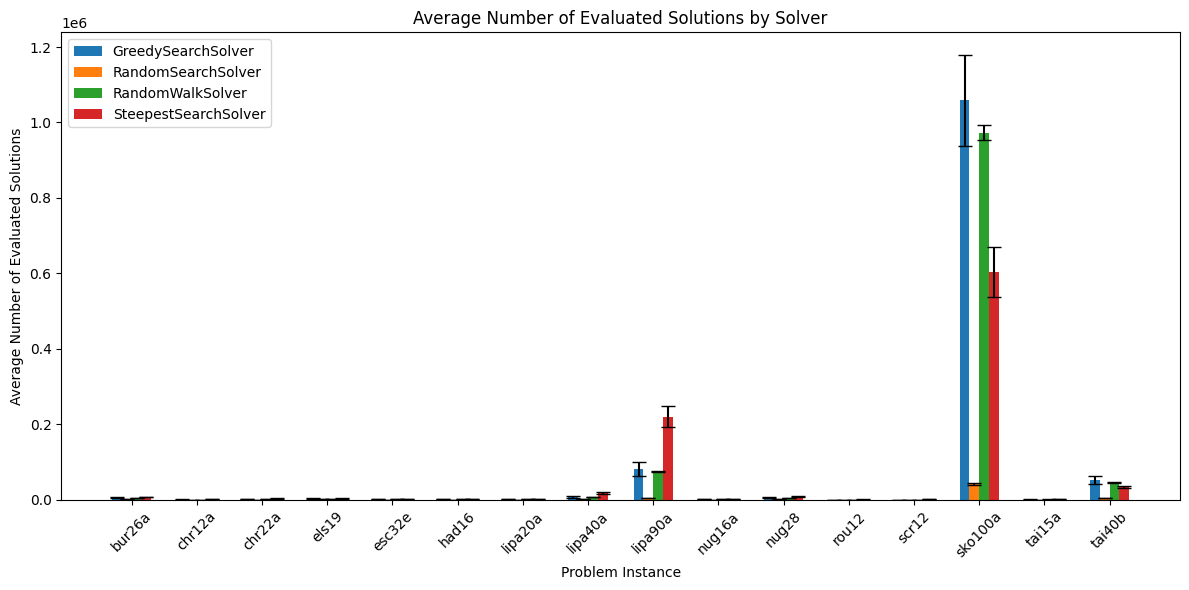

In [51]:
means_evals, stds_evals = get_result_table_with_std("iteration_counts")

means_evals = means_evals.drop('HeuristicSolver', axis=1)
stds_evals = stds_evals.drop('HeuristicSolver', axis=1)

plt.figure(figsize=(12, 6))
bar_width = 0.15
index = np.arange(len(means_evals.index))

for i, solver in enumerate(means_evals.columns):
    plt.bar(index + i * bar_width, 
            means_evals[solver], 
            bar_width,
            yerr=stds_evals[solver],
            label=solver,
            capsize=5)

plt.xlabel('Problem Instance')
plt.ylabel('Average Number of Evaluated Solutions')
plt.title('Average Number of Evaluated Solutions by Solver')
plt.xticks(index + bar_width * 1.5, means_evals.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



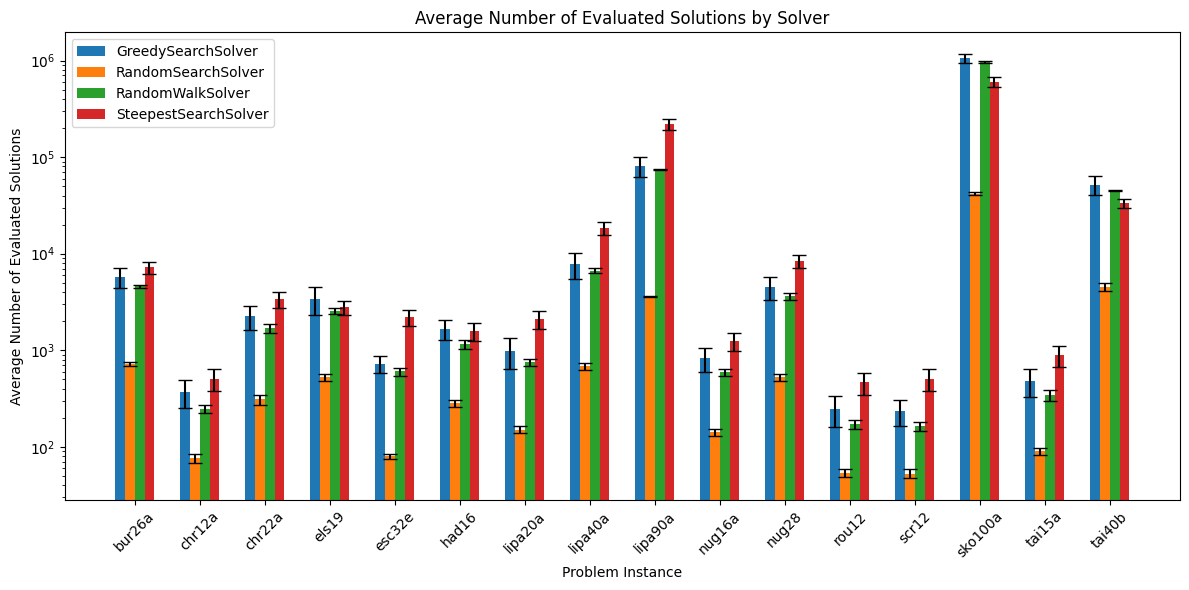

In [49]:
means_evals, stds_evals = get_result_table_with_std("iteration_counts")

means_evals = means_evals.drop('HeuristicSolver', axis=1)
stds_evals = stds_evals.drop('HeuristicSolver', axis=1)

plt.figure(figsize=(12, 6))
bar_width = 0.15
index = np.arange(len(means_evals.index))

for i, solver in enumerate(means_evals.columns):
    plt.bar(index + i * bar_width, 
            means_evals[solver], 
            bar_width,
            yerr=stds_evals[solver],
            label=solver,
            capsize=5)

plt.xlabel('Problem Instance')
plt.ylabel('Average Number of Evaluated Solutions')
plt.title('Average Number of Evaluated Solutions by Solver')
plt.xticks(index + bar_width * 1.5, means_evals.index, rotation=45)
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.show()
